**IPL WINNING TEAM PREDICTION PROJECT**
**TASK 3 of INTERNPE AIML INTERNSHIP**
**DATASET URL : https://drive.google.com/file/d/16Q_kO7NvitDnHOv37yqU6GrrvyvF-ISW/view**

**Importing The Required Libraries**

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics


**Loading and Reading the Data**

In [4]:
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')


In [14]:
print(deliveries.head())   

   match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0        

In [5]:
print(matches.head())
 

   id    Season       city        date                        team1  \
0   1  IPL-2017  Hyderabad  05-04-2017          Sunrisers Hyderabad   
1   2  IPL-2017       Pune  06-04-2017               Mumbai Indians   
2   3  IPL-2017     Rajkot  07-04-2017                Gujarat Lions   
3   4  IPL-2017     Indore  08-04-2017       Rising Pune Supergiant   
4   5  IPL-2017  Bangalore  08-04-2017  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hy

In [13]:
print(deliveries.tail())

        match_id  inning         batting_team    bowling_team  over  ball  \
179073     11415       2  Chennai Super Kings  Mumbai Indians    20     2   
179074     11415       2  Chennai Super Kings  Mumbai Indians    20     3   
179075     11415       2  Chennai Super Kings  Mumbai Indians    20     4   
179076     11415       2  Chennai Super Kings  Mumbai Indians    20     5   
179077     11415       2  Chennai Super Kings  Mumbai Indians    20     6   

          batsman non_striker      bowler  is_super_over  ...  bye_runs  \
179073  RA Jadeja   SR Watson  SL Malinga              0  ...         0   
179074  SR Watson   RA Jadeja  SL Malinga              0  ...         0   
179075  SR Watson   RA Jadeja  SL Malinga              0  ...         0   
179076  SN Thakur   RA Jadeja  SL Malinga              0  ...         0   
179077  SN Thakur   RA Jadeja  SL Malinga              0  ...         0   

        legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
179073    

In [6]:
print(matches.tail())


        id    Season           city        date                  team1  \
751  11347  IPL-2019         Mumbai  05-05-2019  Kolkata Knight Riders   
752  11412  IPL-2019        Chennai  07-05-2019    Chennai Super Kings   
753  11413  IPL-2019  Visakhapatnam  08-05-2019    Sunrisers Hyderabad   
754  11414  IPL-2019  Visakhapatnam  10-05-2019         Delhi Capitals   
755  11415  IPL-2019      Hyderabad  12-05-2019         Mumbai Indians   

                   team2          toss_winner toss_decision  result  \
751       Mumbai Indians       Mumbai Indians         field  normal   
752       Mumbai Indians  Chennai Super Kings           bat  normal   
753       Delhi Capitals       Delhi Capitals         field  normal   
754  Chennai Super Kings  Chennai Super Kings         field  normal   
755  Chennai Super Kings       Mumbai Indians           bat  normal   

     dl_applied               winner  win_by_runs  win_by_wickets  \
751           0       Mumbai Indians            0          

In [7]:
print(len(matches))
print(len(deliveries))

756
179078


In [8]:
print(matches.columns)

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')


In [9]:
print(deliveries.columns)

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')


In [11]:
print(matches.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [12]:
print(deliveries.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [15]:
matches.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [16]:
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [20]:
matches.isna().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [21]:
deliveries.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [22]:
#creating a list of columns and removing unnecessary columns from the list
list1 = matches.columns.to_list()
remove_from_list = ['id', 'date', 'toss_winner', 'toss_decision', 'winner', 
                    'win_by_runs', 'player_of_match', 'venue',
                    'umpire1', 'umpire2', 'umpire3']

for i in range(len(remove_from_list)):
    list1.remove(remove_from_list[i])

In [23]:
for i in list1:
    print('The unique values in', i, 'are: ', matches[i].unique())

The unique values in Season are:  ['IPL-2017' 'IPL-2008' 'IPL-2009' 'IPL-2010' 'IPL-2011' 'IPL-2012'
 'IPL-2013' 'IPL-2014' 'IPL-2015' 'IPL-2016' 'IPL-2018' 'IPL-2019']
The unique values in city are:  ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan
 'Mohali' 'Bengaluru']
The unique values in team1 are:  ['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals']
The unique values in team2 are:  ['Royal Challengers Bangalore' 'Rising Pune Supergi

In [24]:
list2 = deliveries.columns.to_list()
remove_from_list2 = ['match_id', 'batsman','inning', 'non_striker', 
                     'bowler', 'player_dismissed', 'fielder']

for i in range(len(remove_from_list2)):
    list2.remove(remove_from_list2[i])

In [25]:
for i in list2:
    print('The unique values in', i, 'are: ', deliveries[i].unique())

The unique values in batting_team are:  ['Sunrisers Hyderabad' 'Royal Challengers Bangalore' 'Mumbai Indians'
 'Rising Pune Supergiant' 'Gujarat Lions' 'Kolkata Knight Riders'
 'Kings XI Punjab' 'Delhi Daredevils' 'Chennai Super Kings'
 'Rajasthan Royals' 'Deccan Chargers' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Rising Pune Supergiants' 'Delhi Capitals']
The unique values in bowling_team are:  ['Royal Challengers Bangalore' 'Sunrisers Hyderabad'
 'Rising Pune Supergiant' 'Mumbai Indians' 'Kolkata Knight Riders'
 'Gujarat Lions' 'Kings XI Punjab' 'Delhi Daredevils'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals']
The unique values in over are:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
The unique values in ball are:  [1 2 3 4 5 6 7 8 9]
The unique values in is_super_over are:  [0 1]
The unique values in wide_runs are:  [0 2 1 5 3 4]
The unique values in bye_runs are:  [0 

In [26]:
# grouping the 1st innings,2nd innings score in a particular matchid
# lets say match id = 1,so inning 1 score = 207,inning 2 score = 172

totalrun_df=deliveries.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

totalrun_df

C:\Users\GM-RAO\AppData\Local\Temp\ipykernel_13200\3798698391.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  totalrun_df=deliveries.groupby(['match_id','inning']).sum()['total_runs'].reset_index()


,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183
...,...,...,...
1523,11413,2,170
1524,11414,1,155
1525,11414,2,162
1526,11415,1,152


In [27]:
#capturing only the first innings, because we will be predicting the second innings
#Also we are changing total runs into targets by using the lambda function

totalrun_df = totalrun_df[totalrun_df['inning']==1]
totalrun_df['total_runs'] = totalrun_df['total_runs'].apply(lambda x:x+1)#to get target
totalrun_df

C:\Users\GM-RAO\AppData\Local\Temp\ipykernel_13200\2684034329.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totalrun_df['total_runs'] = totalrun_df['total_runs'].apply(lambda x:x+1)#to get target


,match_id,inning,total_runs
0,1,1,208
2,2,1,185
4,3,1,184
6,4,1,164
8,5,1,158
...,...,...,...
1518,11347,1,144
1520,11412,1,137
1522,11413,1,172
1524,11414,1,156


In [28]:
match_df = matches.merge(totalrun_df[['match_id','total_runs']],
                       left_on='id',right_on='match_id')

match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,208
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,185
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,184
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,164
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,144
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,137
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,172
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,156


In [29]:
match_df['team1'].unique()


array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [30]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [31]:
# replacing the Delhi Daredevils with Delhi Capitals

match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

# replacing the Deccan Chargers with Sunrises Hyderabad

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')


In [32]:
# considering only frequently occurring teams,
# which are mentioned in the team's list

match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

match_df['team1'].unique() #again checking unique team names from match_df


array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
       'Mumbai Indians', 'Chennai Super Kings', 'Rajasthan Royals'],
      dtype=object)

In [33]:
# checking the matches which resulted in the DL method

match_df[match_df['dl_applied']==1].style.background_gradient(cmap = 'plasma')

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
56,57,IPL-2017,Bangalore,17-05-2017,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Kolkata Knight Riders,0,7,NM Coulter-Nile,M Chinnaswamy Stadium,AK Chaudhary,Nitin Menon,nan,57,129
99,100,IPL-2008,Delhi,17-05-2008,Delhi Capitals,Kings XI Punjab,Delhi Daredevils,bat,normal,1,Kings XI Punjab,6,0,DPMD Jayawardene,Feroz Shah Kotla,AV Jayaprakash,RE Koertzen,nan,100,119
102,103,IPL-2008,Kolkata,18-05-2008,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,normal,1,Chennai Super Kings,3,0,M Ntini,Eden Gardens,Asad Rauf,K Hariharan,nan,103,150
119,120,IPL-2009,Cape Town,19-04-2009,Kings XI Punjab,Delhi Capitals,Delhi Daredevils,field,normal,1,Delhi Daredevils,0,10,DL Vettori,Newlands,MR Benson,SD Ranade,nan,120,105
122,123,IPL-2009,Durban,21-04-2009,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Kolkata Knight Riders,11,0,CH Gayle,Kingsmead,DJ Harper,SD Ranade,nan,123,159
148,149,IPL-2009,Centurion,07-05-2009,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,1,Chennai Super Kings,12,0,ML Hayden,SuperSport Park,DJ Harper,TH Wijewardene,nan,149,186
280,281,IPL-2011,Kolkata,07-05-2011,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,1,Kolkata Knight Riders,10,0,Iqbal Abdulla,Eden Gardens,Asad Rauf,PR Reiffel,nan,281,115
290,291,IPL-2011,Bangalore,14-05-2011,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,1,Royal Challengers Bangalore,0,4,CH Gayle,M Chinnaswamy Stadium,RE Koertzen,RB Tiffin,nan,291,90
488,489,IPL-2014,Delhi,10-05-2014,Delhi Capitals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,1,Sunrisers Hyderabad,0,8,DW Steyn,Feroz Shah Kotla,RM Deshpande,BNJ Oxenford,nan,489,144
536,537,IPL-2015,Visakhapatnam,22-04-2015,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Sunrisers Hyderabad,16,0,DA Warner,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,RK Illingworth,VA Kulkarni,nan,537,177


In [34]:
# ignoring the rows which were Duckworth lewis system

match_df = match_df[match_df['dl_applied']==0]

# considering the match_id, city, winner, and total runs

match_df = match_df[['match_id','city','winner','total_runs']]

match_df

,match_id,city,winner,total_runs
0,1,Hyderabad,Sunrisers Hyderabad,208
4,5,Bangalore,Royal Challengers Bangalore,158
6,7,Mumbai,Mumbai Indians,179
7,8,Indore,Kings XI Punjab,149
9,10,Mumbai,Mumbai Indians,159
...,...,...,...,...
751,11347,Mumbai,Mumbai Indians,144
752,11412,Chennai,Mumbai Indians,137
753,11413,Visakhapatnam,Delhi Capitals,172
754,11414,Visakhapatnam,Chennai Super Kings,156


In [35]:
#merging matchdf with deliveries on match_id

delivery_df = match_df.merge(deliveries,on='match_id')

delivery_df.head(5)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [36]:
delivery_df.columns

Index(['match_id', 'city', 'winner', 'total_runs_x', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs',
       'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs_y',
       'player_dismissed', 'dismissal_kind', 'fielder'],
      dtype='object')

In [37]:
delivery_df.shape

(149578, 24)

In [38]:
matches.shape

(756, 18)

In [39]:
# to get the current score of a particular match

delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']

delivery_df.head()

C:\Users\GM-RAO\AppData\Local\Temp\ipykernel_13200\581834446.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score
0,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,0,NaN,NaN,NaN,0
1,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,0,0,NaN,NaN,NaN,0
2,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,0,0,4,0,4,NaN,NaN,NaN,4
3,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,0,0,0,NaN,NaN,NaN,4
4,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,0,0,0,2,2,NaN,NaN,NaN,6


In [40]:
# creating column for runs left 

delivery_df['runs_left'] = delivery_df['total_runs_x']-delivery_df['current_score']

delivery_df[['total_runs_x', 'current_score', 'runs_left']].head()

,total_runs_x,current_score,runs_left
0,208,0,208
1,208,0,208
2,208,4,204
3,208,4,204
4,208,6,202


In [41]:
# creating a column for balls left

delivery_df['balls_left'] = 126-(delivery_df['over']*6+delivery_df['ball'])

delivery_df[['over', 'ball', 'balls_left']].head(10)

,over,ball,balls_left
0,1,1,119
1,1,2,118
2,1,3,117
3,1,4,116
4,1,5,115
5,1,6,114
6,1,7,113
7,2,1,113
8,2,2,112
9,2,3,111


In [42]:
delivery_df['player_dismissed']


0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
            ...    
149573          NaN
149574          NaN
149575    SR Watson
149576          NaN
149577    SN Thakur
Name: player_dismissed, Length: 149578, dtype: object

In [43]:
# filling nan values with "0"

delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")

# now we will convert this player_dismissed col into a boolean col
# if the player is not dismissed then it's 0 else it's 1

delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x
                                                                      if x=="0" else "1")

# converting string to int

delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')

In [44]:
# creating a column named wickets left

wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values

delivery_df['wickets_left'] = 10-wickets

C:\Users\GM-RAO\AppData\Local\Temp\ipykernel_13200\179099019.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values


In [45]:
# current RunRate
# It is a common practice to express run rates in cricket which means to 
#express it in runs per over, 
# so the score is multiplied by 6.

delivery_df['cur_run_rate'] = (delivery_df['current_score']*6)/(120-delivery_df['balls_left'])

# required Run-Rate

delivery_df['req_run_rate'] = (delivery_df['runs_left']*6)/(delivery_df['balls_left'])

#Current Run-Rate
delivery_df[['cur_run_rate', 'req_run_rate']].head(10)

,cur_run_rate,req_run_rate
0,0.000000,10.487395
1,0.000000,10.576271
2,8.000000,10.461538
3,6.000000,10.551724
4,7.200000,10.539130
5,6.000000,10.631579
6,6.000000,10.672566
7,6.857143,10.619469
8,9.000000,10.500000
9,8.666667,10.540541


In [48]:
def resultofmatch(row):
    
    return 1 if row['batting_team'] == row['winner'] else 0
    
delivery_df['result'] = delivery_df.apply(resultofmatch,axis=1)


<AxesSubplot: xlabel='result', ylabel='count'>

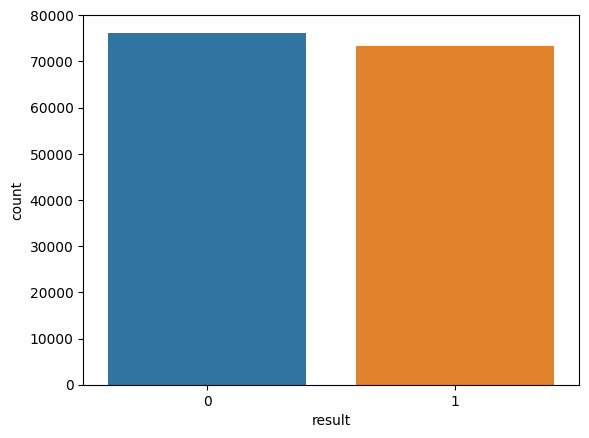

In [50]:
sns.countplot(x=delivery_df['result'])


In [51]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left',
                        'balls_left','wickets_left','total_runs_x','cur_run_rate',
                        'req_run_rate','result']]
                        
                        ##we are taking only important columns 

final_df.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,cur_run_rate,req_run_rate,result
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,208,119,10,208,0.0,10.487395,1
1,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,208,118,10,208,0.0,10.576271,1
2,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,204,117,10,208,8.0,10.461538,1
3,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,204,116,10,208,6.0,10.551724,1
4,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,202,115,10,208,7.2,10.539130,1


In [52]:
final_df.shape

(149578, 10)

In [53]:
final_df.isnull().sum()


batting_team       0
bowling_team       0
city            1700
runs_left          0
balls_left         0
wickets_left       0
total_runs_x       0
cur_run_rate       0
req_run_rate       0
result             0
dtype: int64

In [54]:
# dropping of null values

final_df = final_df.dropna()

final_df.isnull().sum()

batting_team    0
bowling_team    0
city            0
runs_left       0
balls_left      0
wickets_left    0
total_runs_x    0
cur_run_rate    0
req_run_rate    0
result          0
dtype: int64

In [55]:
final_df = final_df[final_df['balls_left'] != 0]


In [56]:
data = final_df.copy()

test = data['result']

train = data.drop(['result'],axis = 1)

train.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,cur_run_rate,req_run_rate
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,208,119,10,208,0.0,10.487395
1,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,208,118,10,208,0.0,10.576271
2,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,204,117,10,208,8.0,10.461538
3,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,204,116,10,208,6.0,10.551724
4,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,202,115,10,208,7.2,10.539130


In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train,test,test_size=0.20,random_state=1)

X_train.shape,X_test.shape

((117650, 9), (29413, 9))

In [63]:
X_train.columns

Index(['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left',
       'wickets_left', 'total_runs_x', 'cur_run_rate', 'req_run_rate'],
      dtype='object')

In [64]:
# batting team, bowling team, and city are categorical columns
# they will be converted to numeric using a one-hot encoder

cf = ColumnTransformer(transformers = [
    ('tnf1',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
],remainder='passthrough')

In [65]:
# creating the pipeline

# lr = LogisticRegression(solver='liblinear')
pipe = Pipeline(steps=[
    ('step1', cf),
    ('step2',LogisticRegression(solver='liblinear'))
])

# fitting the training data

pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf1',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [66]:
y_pred = pipe.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.6113963213545031


In [67]:
pipe.predict_proba(X_test)[10]


array([0.33538609, 0.66461391])

In [68]:
# rf = RandomForestClassifier()
pipe2 = Pipeline(steps=[
    ('step1', cf),
    ('step2',RandomForestClassifier())
])

pipe2.fit(X_train,y_train)
print(metrics.accuracy_score(y_test,pipe2.predict(X_test)))

0.9991160371264407


In [69]:
pipe2.predict_proba(X_test)[10]


array([0.01, 0.99])

In [86]:
from sklearn.tree import DecisionTreeClassifier

pipe3 = Pipeline(steps=[
    ('step1', cf),
    ('step2',DecisionTreeClassifier())
])

pipe3.fit(X_train,y_train)
print(metrics.accuracy_score(y_test,pipe2.predict(X_test)))

0.9991160371264407


In [70]:
rf = RandomForestClassifier()

In [73]:
import joblib

In [74]:
joblib.dump(pipe2,'ipl_prediction_model')

['ipl_prediction_model']

In [75]:
model = joblib.load('ipl_prediction_model')

In [76]:
final_df.columns

Index(['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left',
       'wickets_left', 'total_runs_x', 'cur_run_rate', 'req_run_rate',
       'result'],
      dtype='object')

In [78]:
final_df.head(3)

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,cur_run_rate,req_run_rate,result
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,208,119,10,208,0.0,10.487395,1
1,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,208,118,10,208,0.0,10.576271,1
2,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,204,117,10,208,8.0,10.461538,1


In [77]:
X_train.columns

Index(['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left',
       'wickets_left', 'total_runs_x', 'cur_run_rate', 'req_run_rate'],
      dtype='object')

In [82]:
import pickle

In [83]:
pickle.dump(pipe2,open('predictor.pkl','wb'))

In [84]:
pickle.dump(pipe,open('predicton.pkl','wb'))

**Now we will build an front end to predict the winner in an ipl match Using Streamlit framework**